# T-shirt vs Dress-shirt Classification


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from skimage.feature import hog
from skimage import exposure
from sklearn.svm import SVC

# 1. Importing Data

In [6]:
Xtr=np.loadtxt("TrainData.csv")
Ytr=np.loadtxt("TrainLabels.csv")
Xts=np.loadtxt("TestData.csv")

In [7]:
df = pd.DataFrame(Xtr,Ytr)
FD=[]  
HOG=[]
xtr_len = len(Xtr)
for i in range(0,xtr_len):
    resizd_image = Xtr[i].reshape(28,28)
    fd, HOG_image = hog(resizd_image, orientations=9, pixels_per_cell=(8, 8),  cells_per_block=(2, 2) , visualize=True)
    FD.append(fd)
    HOG.append(HOG_image)

In [8]:
df['FD'] = FD
df['HOG'] = HOG
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,776,777,778,779,780,781,782,783,FD,HOG
-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,99.0,56.0,57.0,19.0,0.0,4.0,0.0,0.0,"[0.2530798051089891, 0.2825351150792843, 0.330...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,50.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,"[0.2546673678325564, 0.2546673678325564, 0.246...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85.0,...,208.0,106.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.2105924313367784, 0.1473637110322735, 0.0, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,119.0,0.0,...,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.2625259773951471, 0.0, 0.0, 0.0, 0.00204908...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.27877680362810336, 0.14051378526035135, 0.2...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


# Creating CSV

# Splitting Data

In [10]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, y_Train, y_Test = train_test_split(np.array(FD), Ytr, test_size=0.1, random_state=9)

In [11]:
# X_Train

In [12]:
# X_Test

In [13]:
# y_Train

In [14]:
# y_Test

# DecisionTreeClassifier

In [15]:
from sklearn.naive_bayes import GaussianNB #model = GaussianNB()-choice
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
model = DecisionTreeClassifier(criterion="entropy", max_depth=3)
model.fit(X_Train,y_Train)
print()

# Accuracy scores

In [16]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_Test)
accur = metrics.accuracy_score(y_Test, y_pred)
print("Accuracy of model 1 is :"+ str(accur) + " or " +str(accur * 100)+" %" )

Accuracy of model 1 is :0.7175 or 71.75 %


# Creating CSV


In [17]:
df_1 = pd.DataFrame()
df_1['test1']=y_pred
df_1.to_csv('data_1.csv')

In [18]:

from sklearn import svm , metrics
model = svm.SVC(kernel='linear')
model.fit(X_Train, y_Train)
y_pred = model.predict(X_Test)
acc = metrics.accuracy_score(y_Test, y_pred)
print("Accuracy of model 2 is :"+str(acc) + " or " +str(acc * 100)+" %")

Accuracy of model 2 is :0.775 or 77.5 %


# Creating CSV


In [19]:
df_1['test2']=y_pred
# df_1.to_csv('values1.csv')

# Image HOG Features

In [15]:
from skimage.io import imread, imshow
image = imread('Image.jpeg')
fd, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True, )

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 7), sharex=True, sharey=True) 
ax1.imshow(image) 
ax1.set_title('Input image')
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10)) 
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray) 
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

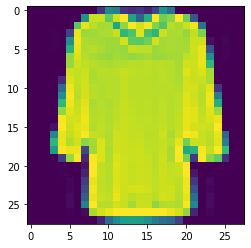

In [17]:
image = Xtr[2653].reshape([28,28])
plt.imshow(image)

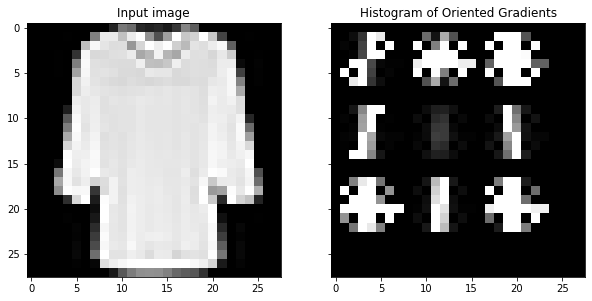

In [18]:
resized_img = image.reshape(28,28)
fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),   cells_per_block=(2, 2), visualize=True, )
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True) 

ax1.imshow(resized_img, cmap=plt.cm.gray) 
ax1.set_title('Input image') 
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10)) 
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray) 
ax2.set_title('Histogram of Oriented Gradients')

plt.show()